[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


=== 단기 수익률 기준 박근혜 테마주 vs KODEX200 상관계수 ===
KODEX200    1.000000
대유신소재       0.716258
세운메디칼       0.676584
아가방컴퍼니      0.045708
EG         -0.021321
동양물산       -0.086498
대유에이텍      -0.099590
보령메디앙스     -0.142429
Name: KODEX200, dtype: float64


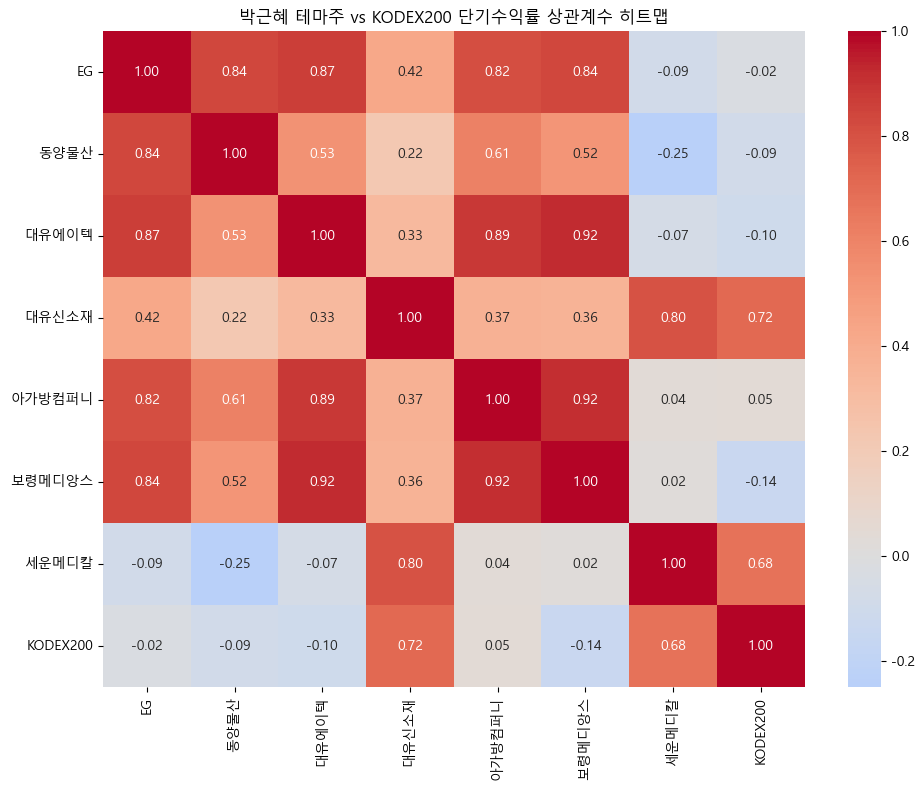

In [5]:
import yfinance  as yf
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False


label_dict = {
    'thema1': 'EG',
    'thema2': '동양물산',
    'thema3': '대유에이텍',
    'thema4': '대유신소재',
    'thema6' : '아가방컴퍼니',
    'thema7' : '보령메디앙스',
    'thema8' : '세운메디칼'
}


# 날짜 설정
start_date = '2012-08-10' #경선확정일 - 10
end_date = '2012-08-30' #경선확정일 + 10

#테마주2  테마를 추가하고싶으면 아래에 이어서 적으시면됩니다.# thema2 = fdr.DataReader('015260', start=start_date, end=end_date)
#(1) 이 밑으로 계속 추가한 후 plt 부분에 같이 추가하시면 같이 시각화 가능
thema1 =  yf.download('037370.ks', start=start_date, end=end_date) #테마주1
thema2 =  yf.download('002900.ks', start=start_date, end=end_date)
thema3 =  yf.download('002880.ks', start=start_date, end=end_date)
thema4 =  yf.download('005930.ks', start=start_date, end=end_date)
thema6 = yf.download('013990.ks', start=start_date, end=end_date)
thema7 = yf.download('014100.ks', start=start_date, end=end_date)
thema8 = yf.download('100700.ks', start=start_date, end=end_date)


thema= pd.DataFrame()
#(1)에 추가했을 경우 이 부분도 추가해주세요
thema['thema1'] = thema1['Close']
thema['thema2'] = thema2['Close']
thema['thema3'] = thema3['Close']
thema['thema4'] = thema4['Close']
thema['thema6'] = thema6['Close']
thema['thema7'] = thema7['Close']
thema['thema8'] = thema8['Close']


# 일간 기준 리샘플링 및 로그수익률 계산
thema = thema.resample('d').last()
thema_returns = np.log(thema / thema.shift(1)).dropna()
thema_returns_named = thema_returns.rename(columns=label_dict)

# KODEX200 수집 및 수익률 계산
kodex = yf.download('069500.KS', start=start_date, end=end_date)['Close']
kodex = kodex.resample('d').last()
kodex_return = np.log(kodex / kodex.shift(1)).dropna()

# KODEX200 수익률 추가
thema_returns_named['KODEX200'] = kodex_return

# 상관관계 계산
correlation_matrix = thema_returns_named.corr()

# 출력
print("=== 단기 수익률 기준 박근혜 테마주 vs KODEX200 상관계수 ===")
print(correlation_matrix['KODEX200'].sort_values(ascending=False))

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("박근혜 테마주 vs KODEX200 단기수익률 상관계수 히트맵")
plt.tight_layout()
plt.show()
